# School Dropout Risk Analysis

# 1. Introduction
This project analyzes student data to identify dropout risk factors and builds a prediction model.

# 2. Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib



# 3. Load the Dataset

In [4]:
df = pd.read_csv('data.csv' , delimiter=';')

In [5]:
df.head()


Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

# 4. Understand the Data

In [6]:
print(df.columns.tolist())

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [10]:
print(df.describe(include='all'))

        Marital status  Application mode  Application order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571         18.669078           1.727848  8856.642631   
std           0.605747         17.484682           1.313793  2063.566416   
min           1.000000          1.000000           0.000000    33.000000   
25%           1.000000          1.000000           1.000000  9085.000000   
50%           1.000000         17.000000           1.000000  9238.000000   
75%           1.000000         39.000000           2.000000  9556.000000   
max           6.000000         57.000000           9.000000  9991.000000   

        Daytime/evening attendance\t  Previous qualification  \
count                  

In [7]:
print(df.shape)

(4424, 37)


# 5. Data Cleaning
Handle null values and label encoding:

In [8]:
print(df.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [9]:
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [11]:
df.columns = df.columns.str.strip().str.replace('"', '').str.replace('\\t', '')

In [12]:
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [13]:
df = df.apply(pd.to_numeric, errors='ignore')

C:\Users\Rohith\AppData\Local\Temp\ipykernel_24008\1277559549.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


### 🔄 Convert Columns to Numeric (if possible)


In [14]:
def try_numeric(col):
    try:
        return pd.to_numeric(col)
    except:
        return col

df = df.apply(try_numeric)

In [15]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

# Encode Target Column (Label Encoding)

In [16]:
df['Target'].value_counts()


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [17]:
df = pd.read_csv('data.csv', sep=';')

print(df['Target'].value_counts())

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

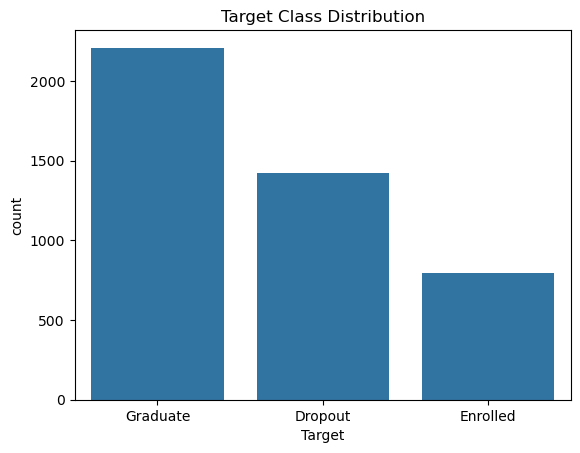

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Target', order=df['Target'].value_counts().index)
plt.title('Target Class Distribution')
plt.show()

In [19]:
df.describe(include='all').transpose()

count unique       top  freq  \
Marital status                                  4424.0    NaN       NaN   NaN   
Application mode                                4424.0    NaN       NaN   NaN   
Application order                               4424.0    NaN       NaN   NaN   
Course                                          4424.0    NaN       NaN   NaN   
Daytime/evening attendance\t                    4424.0    NaN       NaN   NaN   
Previous qualification                          4424.0    NaN       NaN   NaN   
Previous qualification (grade)                  4424.0    NaN       NaN   NaN   
Nacionality                                     4424.0    NaN       NaN   NaN   
Mother's qualification                          4424.0    NaN       NaN   NaN   
Father's qualification                          4424.0    NaN       NaN   NaN   
Mother's occupation                             4424.0    NaN       NaN   NaN   
Father's occupation                             4424.0    NaN       NaN   NaN   
Admission grade                                 4424.0    NaN       NaN   NaN   
Displaced                                       4424.0    NaN       NaN   NaN   
Educational special needs                       4424.0    NaN       NaN   NaN   
Debtor                                          4424.0    NaN       NaN   NaN   
Tuition fees up to date                         4424.0    NaN       NaN   NaN   
Gender                                          4424.0    NaN       NaN   NaN   
Scholarship holder                              4424.0    NaN       NaN   NaN   
Age at enrollment                               4424.0    NaN       NaN   NaN   
International                                   4424.0    NaN       NaN   NaN   
Curricular units 1st sem (credited)             4424.0    NaN       NaN   NaN   
Curricular units 1st sem (enrolled)             4424.0    NaN       NaN   NaN   
Curricular units 1st sem (evaluations)          4424.0    NaN       NaN   NaN   
Curricular units 1st sem (approved)             4424.0    NaN       NaN   NaN   
Curricular units 1st sem (grade)                4424.0    NaN       NaN   NaN   
Curricular units 1st sem (without evaluations)  4424.0    NaN       NaN   NaN   
Curricular units 2nd sem (credited)             4424.0    NaN       NaN   NaN   
Curricular units 2nd sem (enrolled)             4424.0    NaN       NaN   NaN   
Curricular units 2nd sem (evaluations)          4424.0    NaN       NaN   NaN   
Curricular units 2nd sem (approved)             4424.0    NaN       NaN   NaN   
Curricular units 2nd sem (grade)                4424.0    NaN       NaN   NaN   
Curricular units 2nd sem (without evaluations)  4424.0    NaN       NaN   NaN   
Unemployment rate                               4424.0    NaN       NaN   NaN   
Inflation rate                                  4424.0    NaN       NaN   NaN   
GDP                                             4424.0    NaN       NaN   NaN   
Target                                            4424      3  Graduate  2209   

                                                       mean          std  \
Marital status                                     1.178571     0.605747   
Application mode                                  18.669078    17.484682   
Application order                                  1.727848     1.313793   
Course                                          8856.642631  2063.566416   
Daytime/evening attendance\t                       0.890823     0.311897   
Previous qualification                             4.577758    10.216592   
Previous qualification (grade)                   132.613314    13.188332   
Nacionality                                        1.873192     6.914514   
Mother's qualification                            19.561935    15.603186   
Father's qualification                            22.275316    15.343108   
Mother's occupation                               10.960895    26.418253   
Father's occupation                               11.03232

In [52]:
df.columns = df.columns.str.replace('\t', '', regex=True)


In [21]:
df.columns = df.columns.str.replace('\t', '',regex=True)

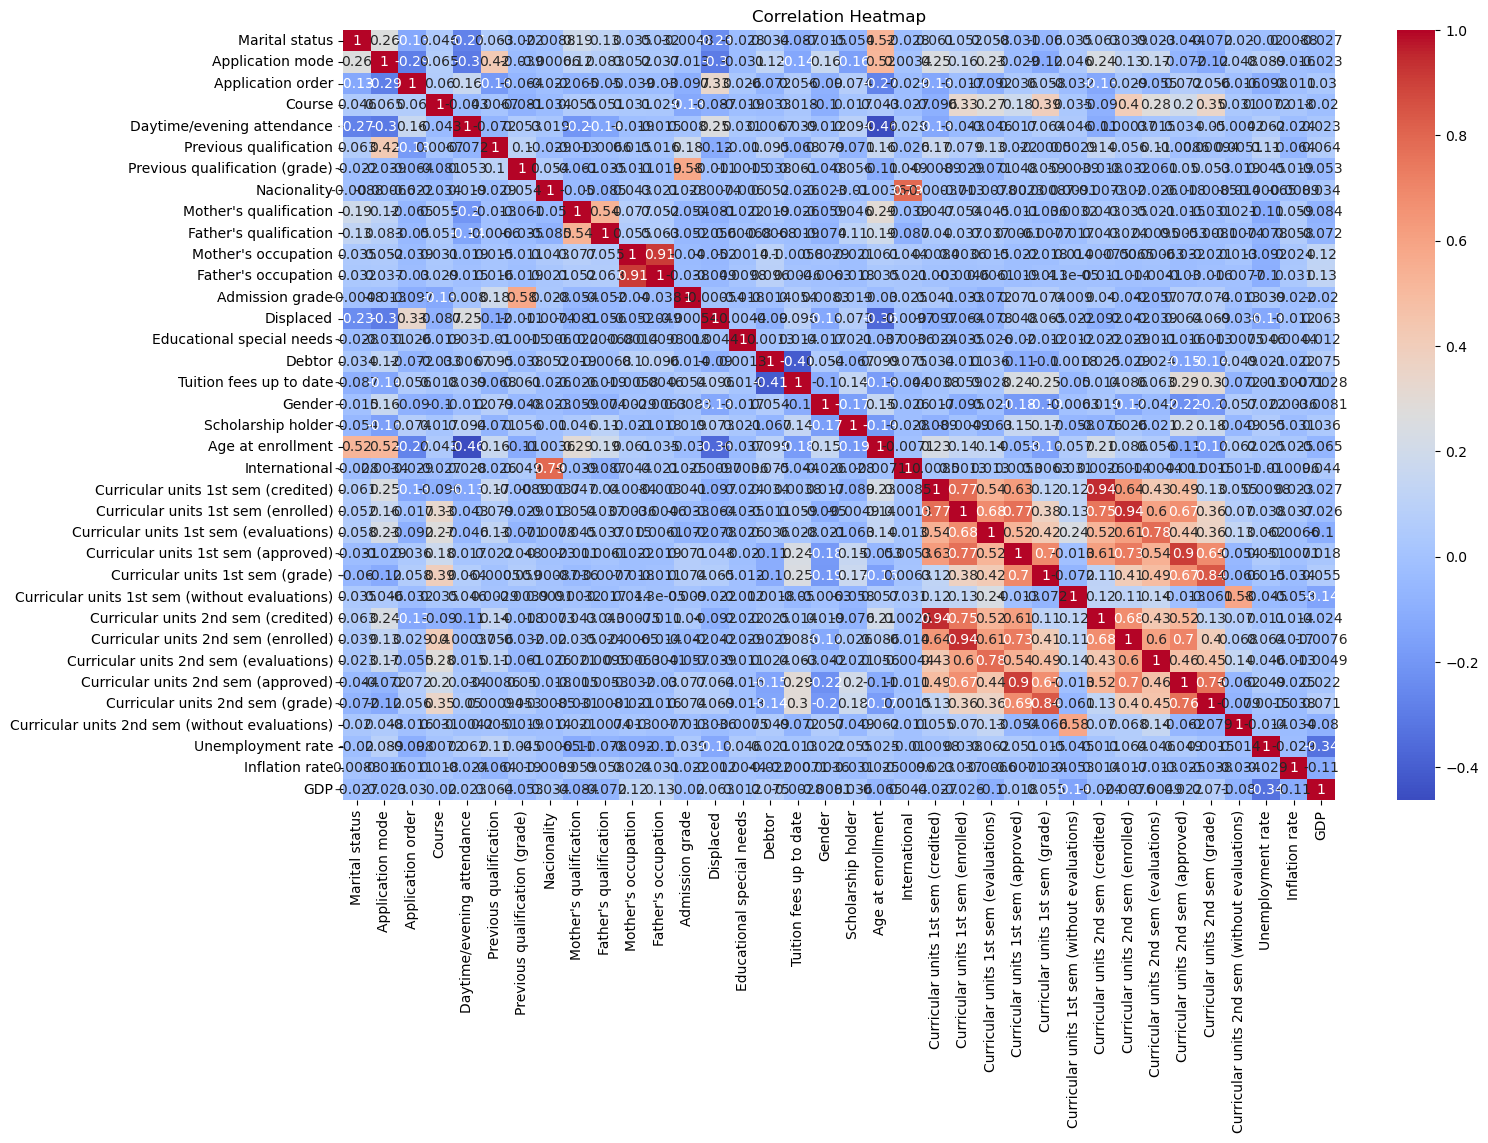

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Correlation Matrix (Heatmap)

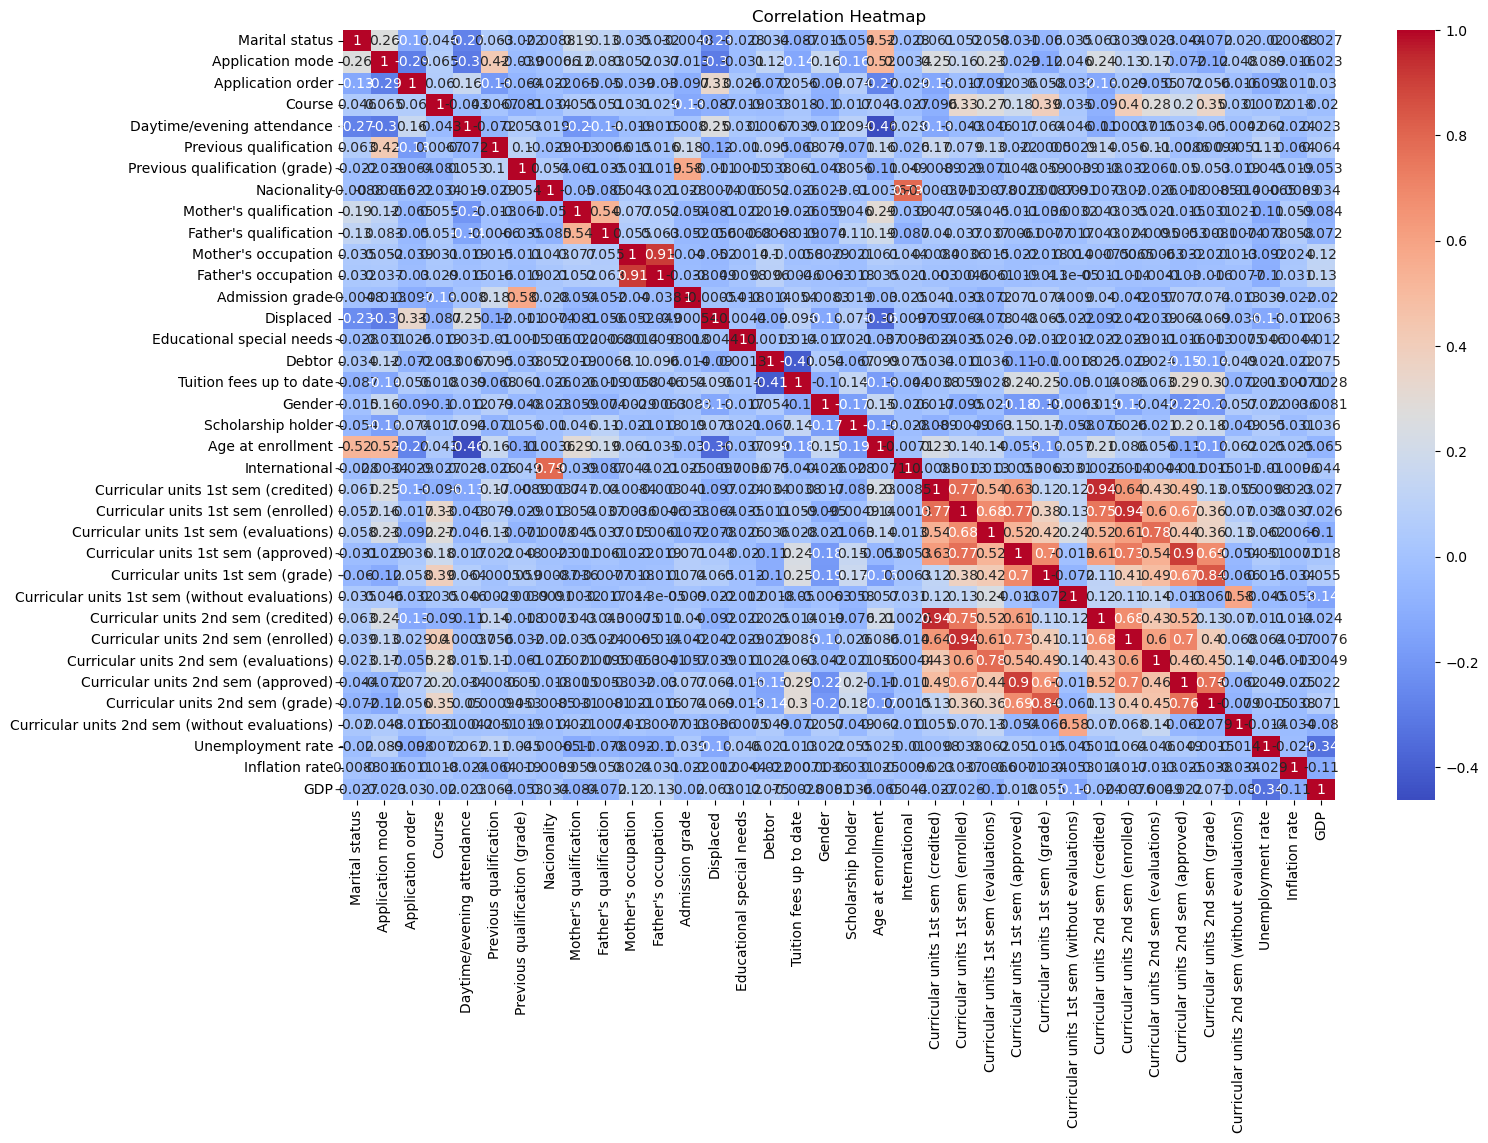

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = df.columns.str.replace('\t', '', regex=True)
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#How to Read the Heatmap:
Values range from -1 to 1:

1.0 = strong positive correlation

-1.0 = strong negative correlation

0.0 = no correlation

# Target Variable Distribution

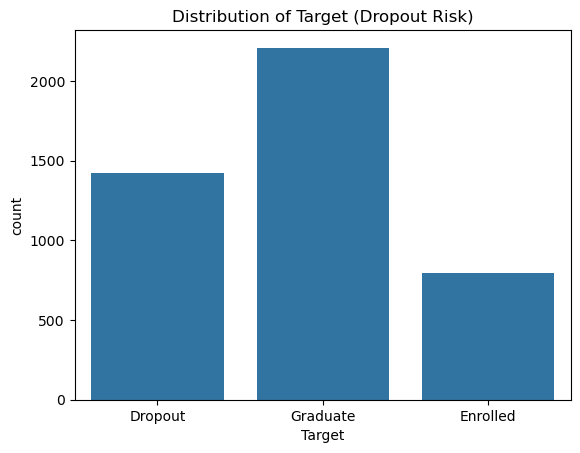

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target',data=df)
plt.title("Distribution of Target (Dropout Risk)")
plt.show()

#  Numerical Features Distribution

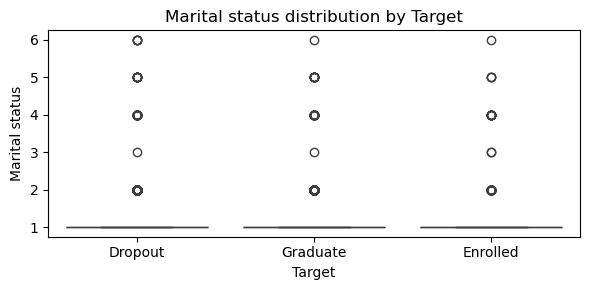

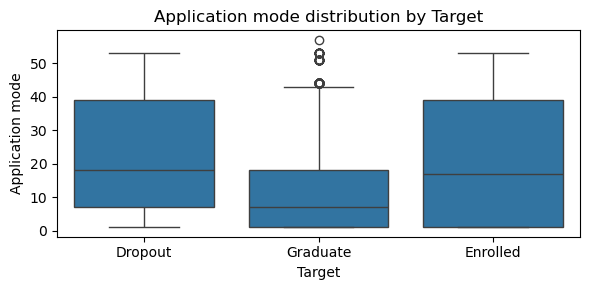

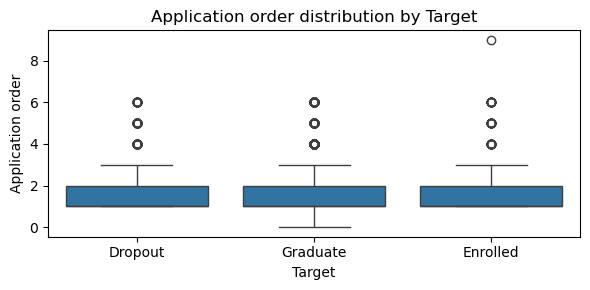

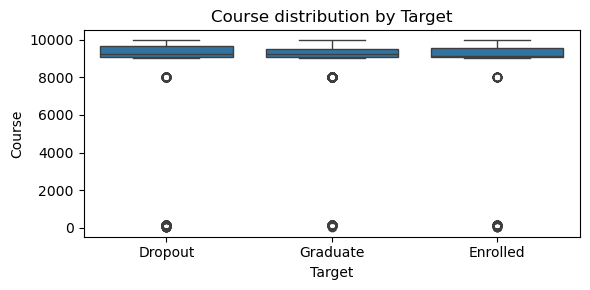

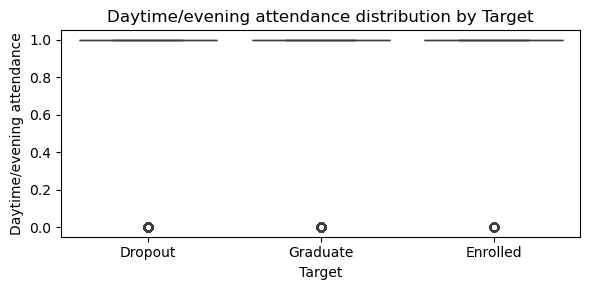

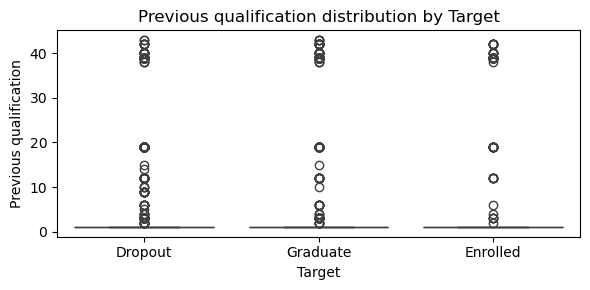

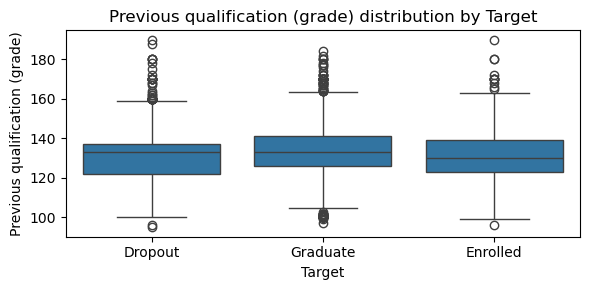

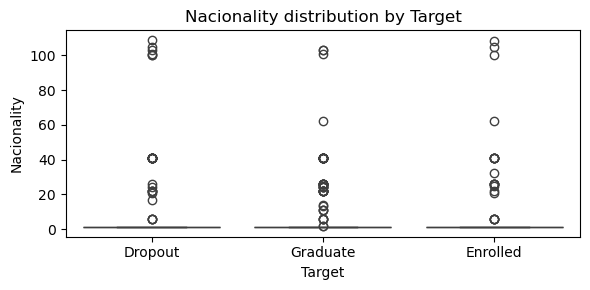

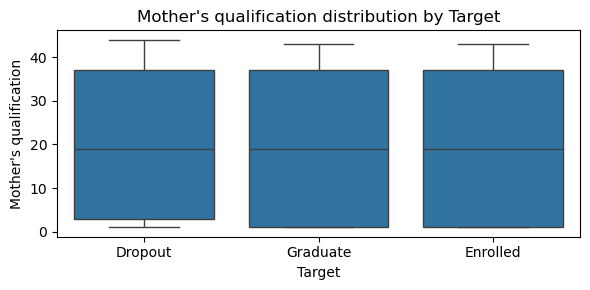

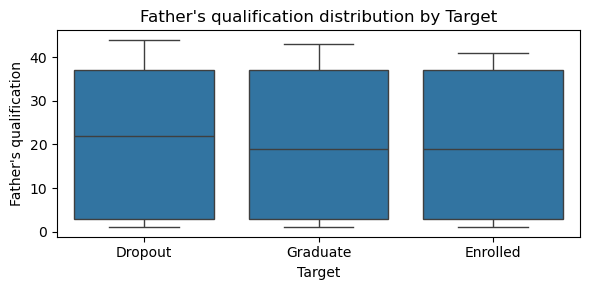

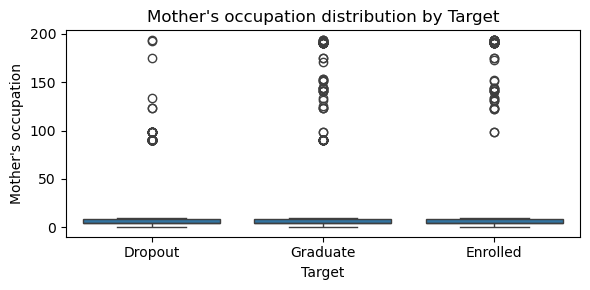

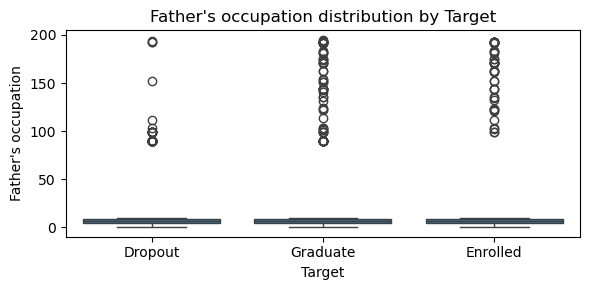

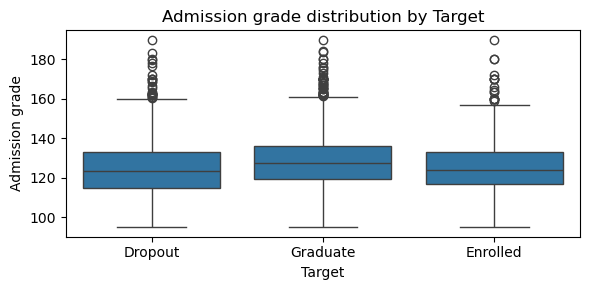

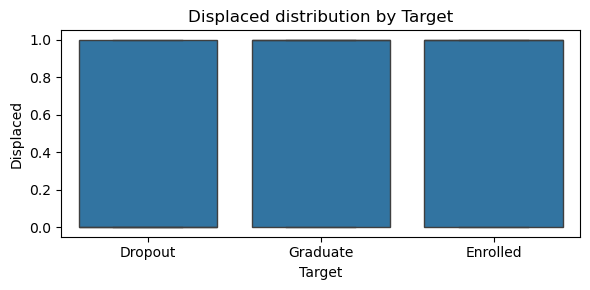

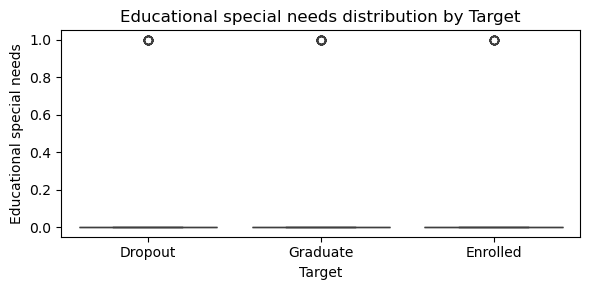

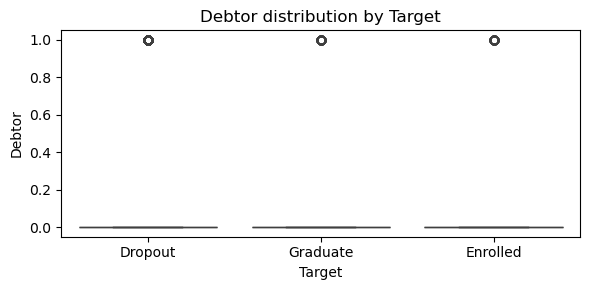

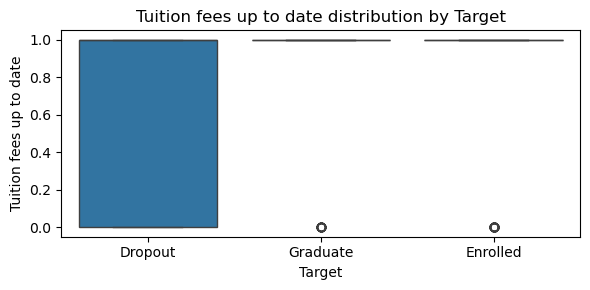

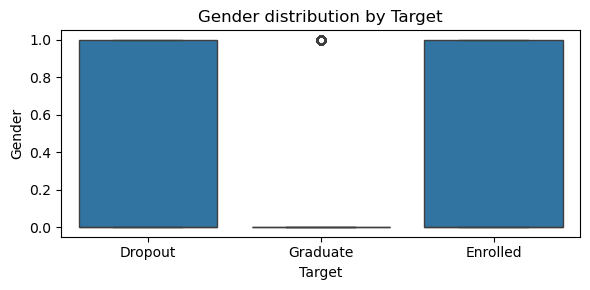

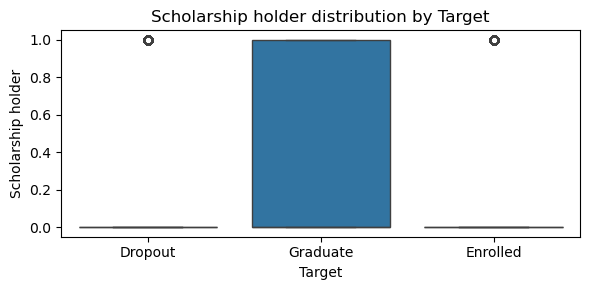

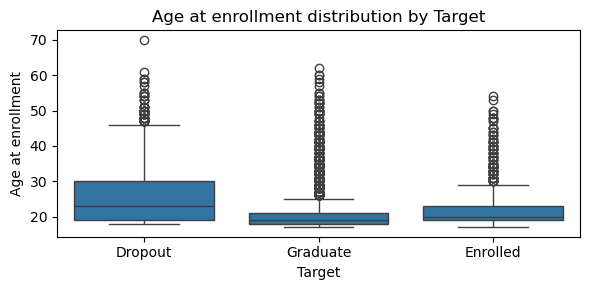

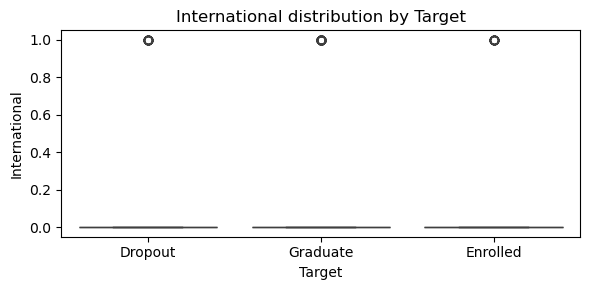

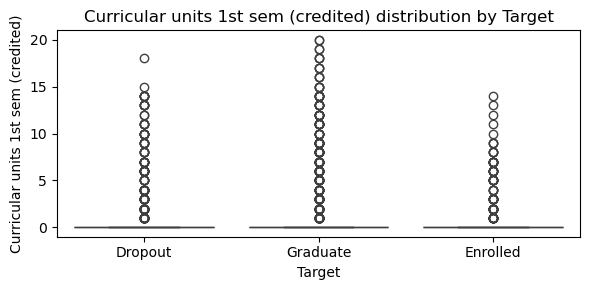

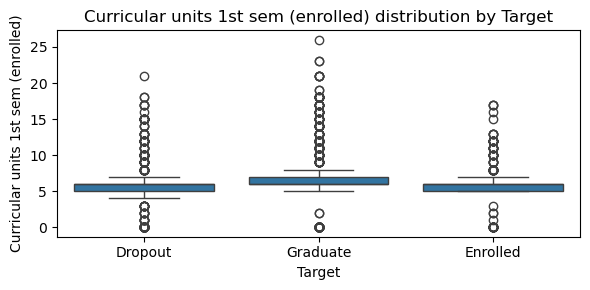

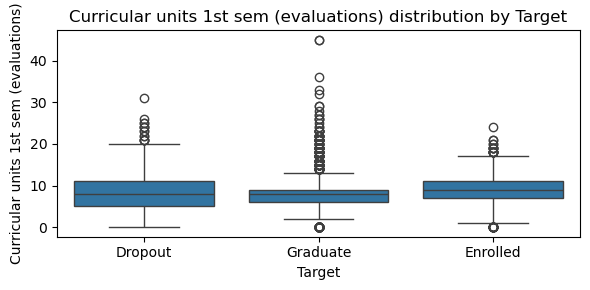

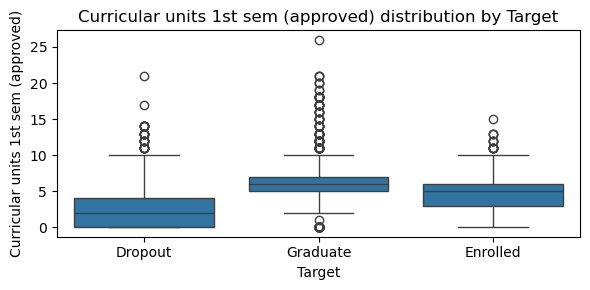

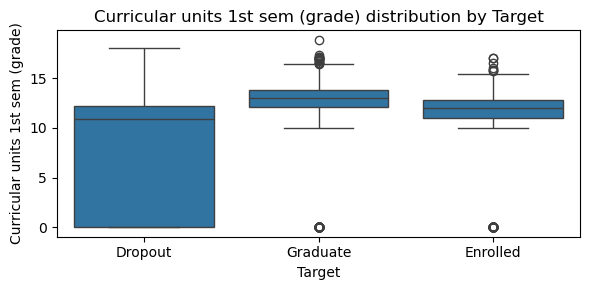

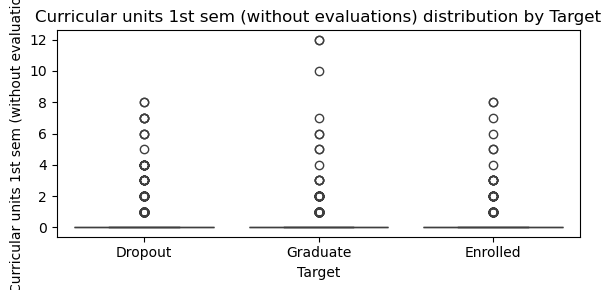

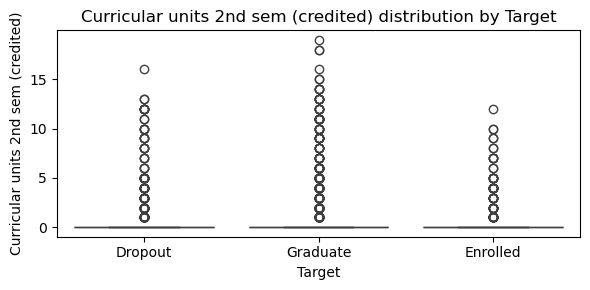

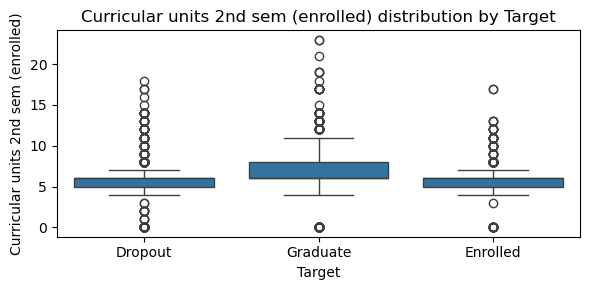

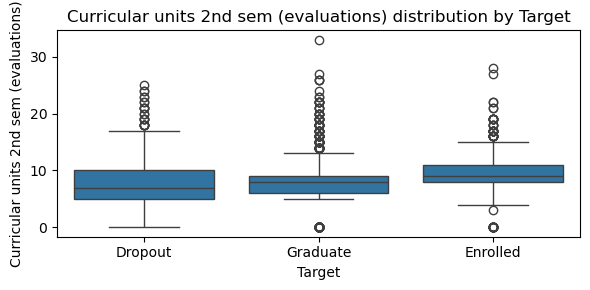

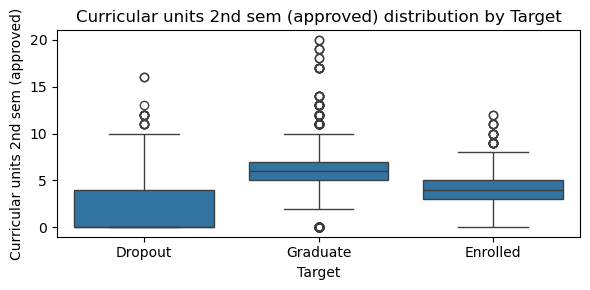

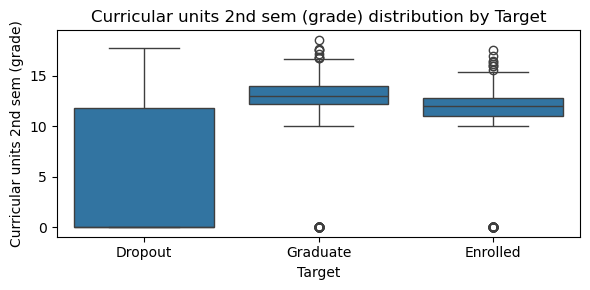

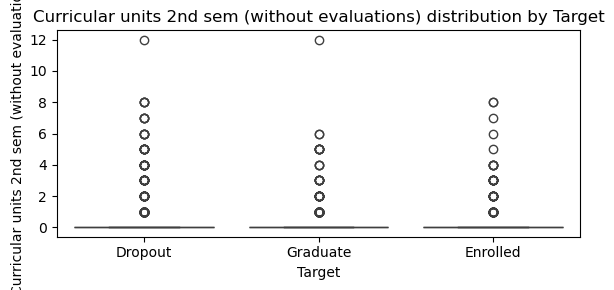

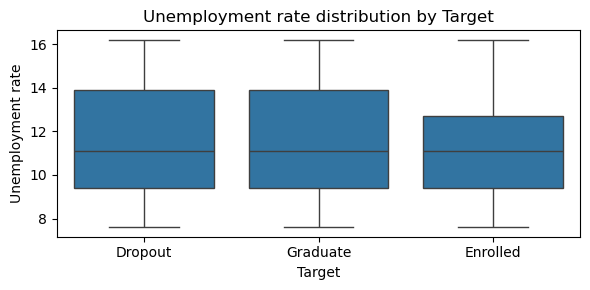

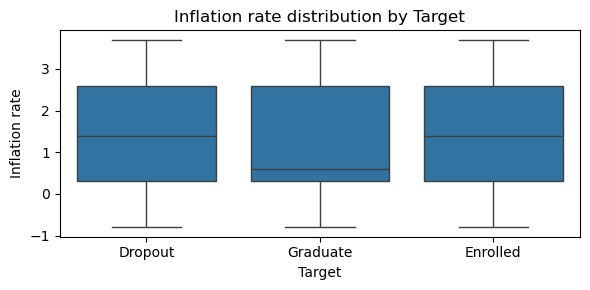

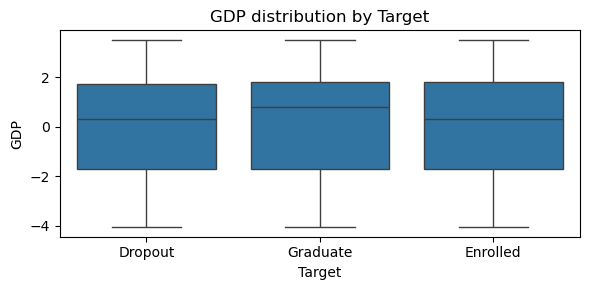

In [25]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    if col != 'Target':
        plt.figure(figsize=(6, 3))
        sns.boxplot(x='Target', y=col, data=df)
        plt.title(f'{col} distribution by Target')
        plt.tight_layout()
        plt.show()


# Categorical Feature Distribution

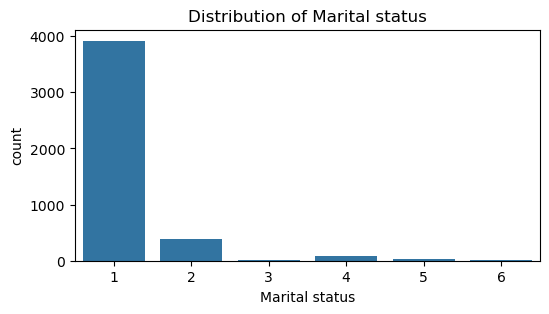

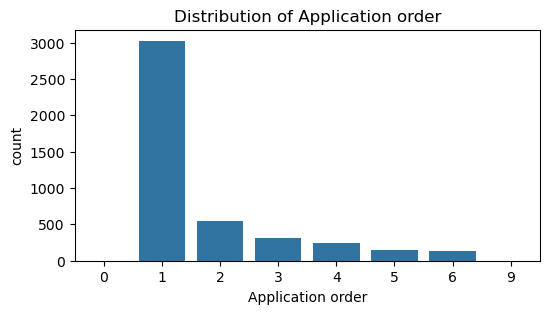

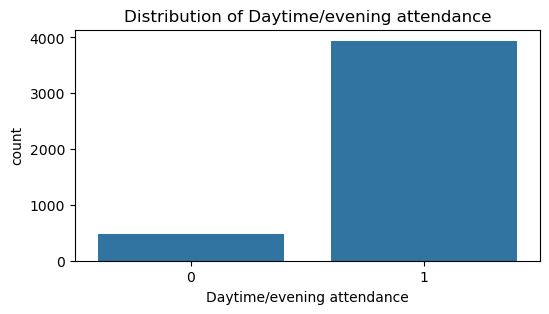

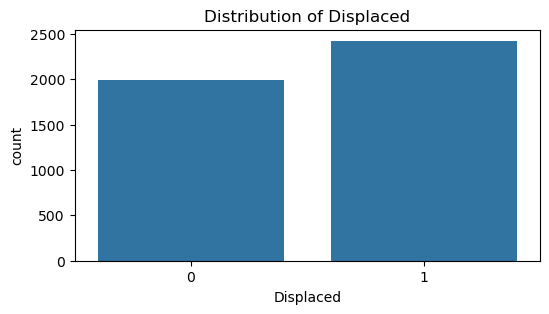

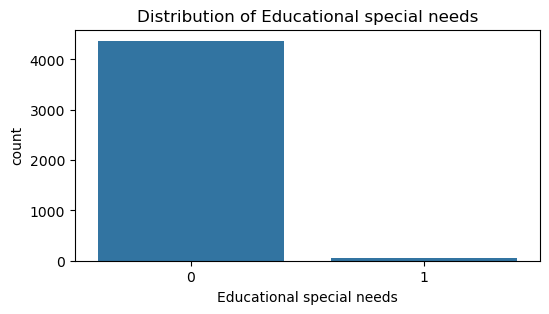

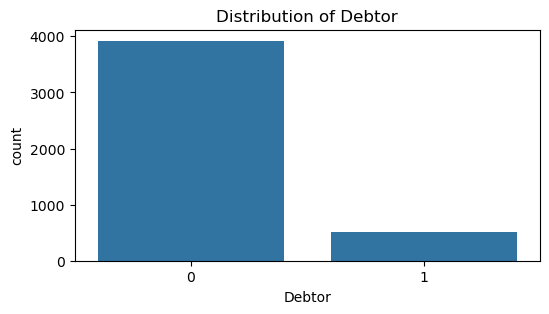

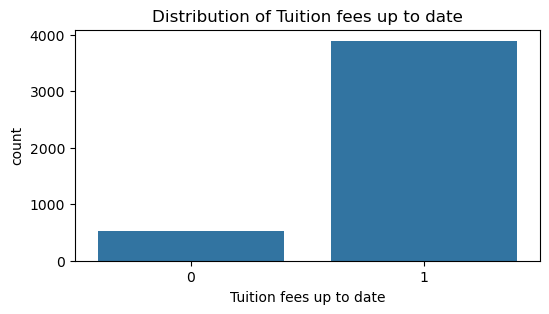

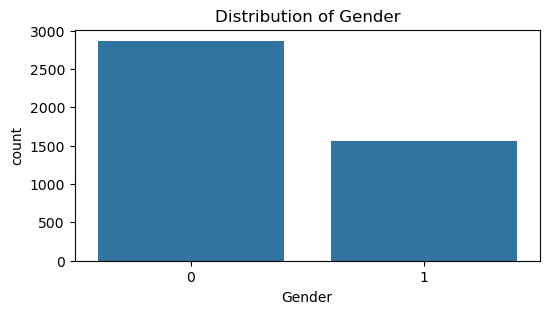

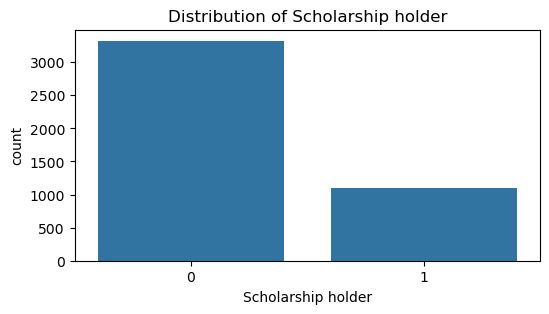

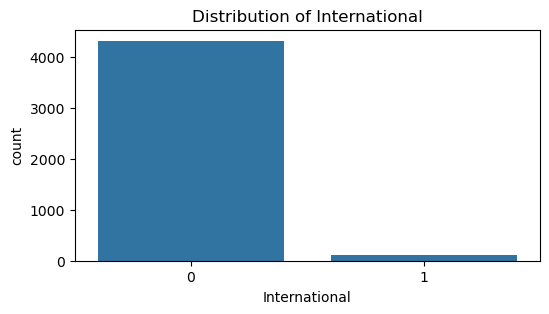

In [26]:
categorical_cols = df.select_dtypes(include='int64').columns

for col in categorical_cols:
    if df[col].nunique() < 10 and col != 'Target':
        plt.figure(figsize=(6, 3))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.show()


In [28]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [29]:
import pandas as pd

df = pd.read_csv('data.csv', delimiter=';')  # Use your correct path


In [30]:
%matplotlib inline


In [31]:
%matplotlib inline


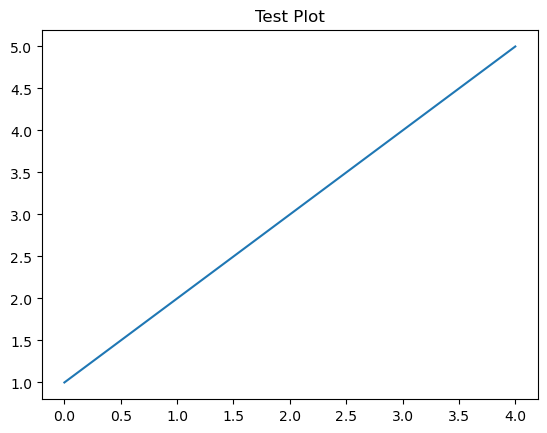

In [32]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4, 5])
plt.title("Test Plot")
plt.show()


# Relationship between each feature and the Target (Dropout, Enrolled, Graduate)

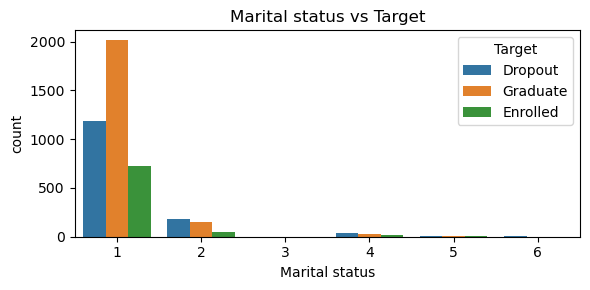

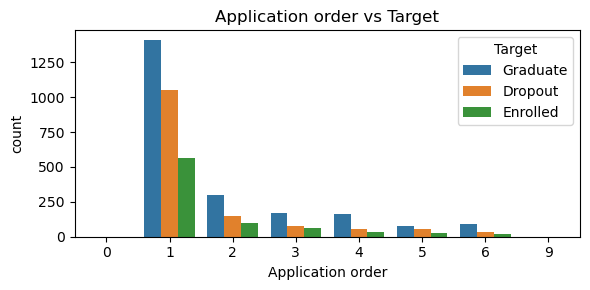

C:\Users\Rohith\AppData\Local\Temp\ipykernel_24008\404314034.py:11: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


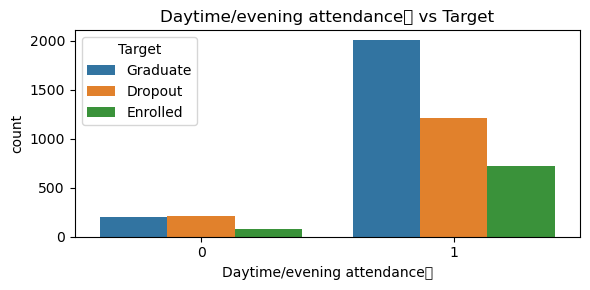

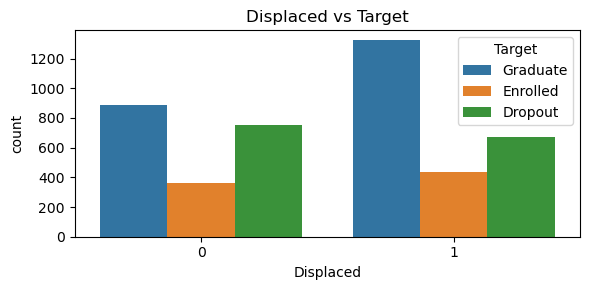

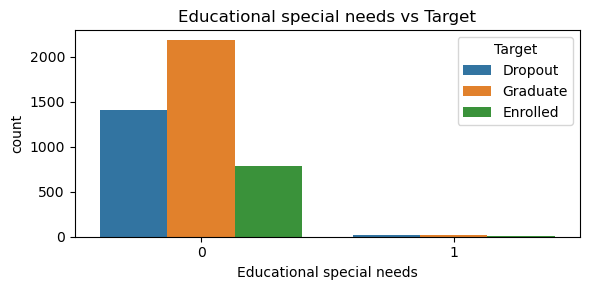

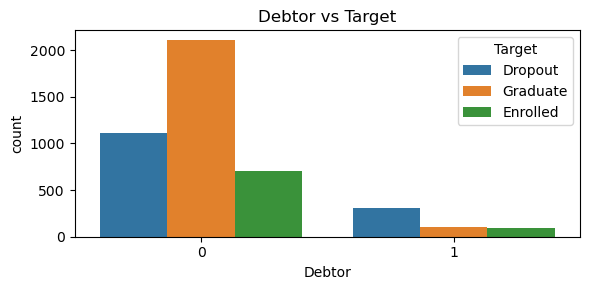

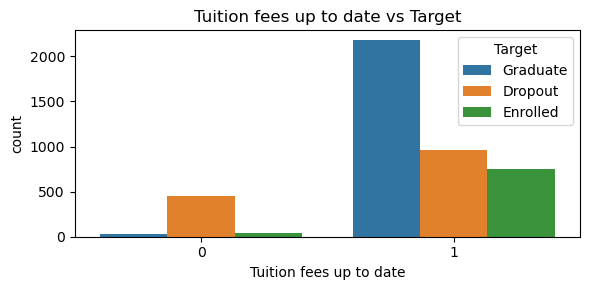

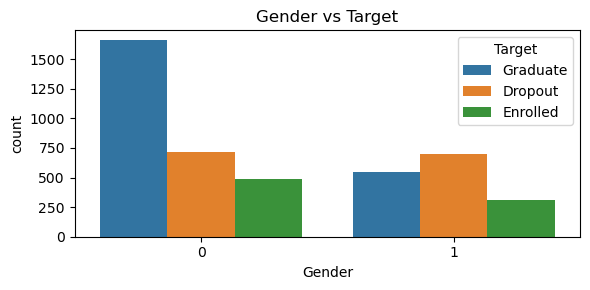

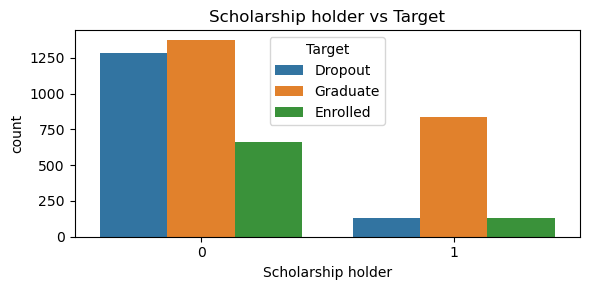

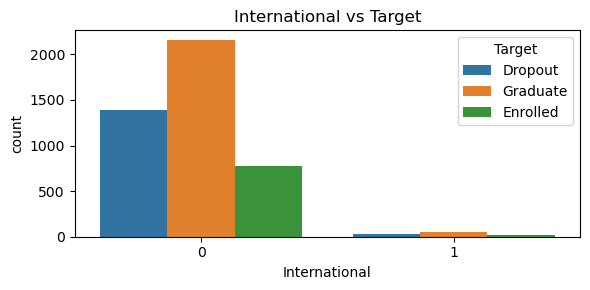

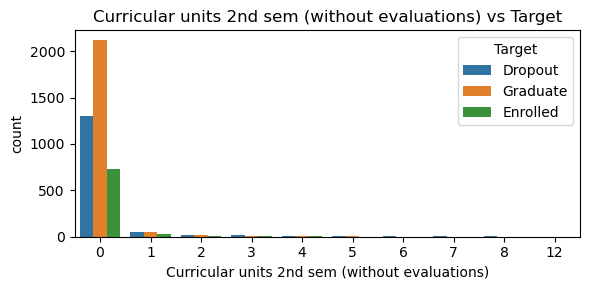

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include='int64').columns

for col in categorical_cols:
    if df[col].nunique() <= 10 and col != 'Target':
        plt.figure(figsize=(6, 3))
        sns.countplot(x=col, hue='Target', data=df)
        plt.title(f'{col} vs Target')
        plt.tight_layout()
        plt.show()


In [7]:
import pandas as pd

df = pd.read_csv("data.csv", delimiter=';')
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

# correlation between features

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


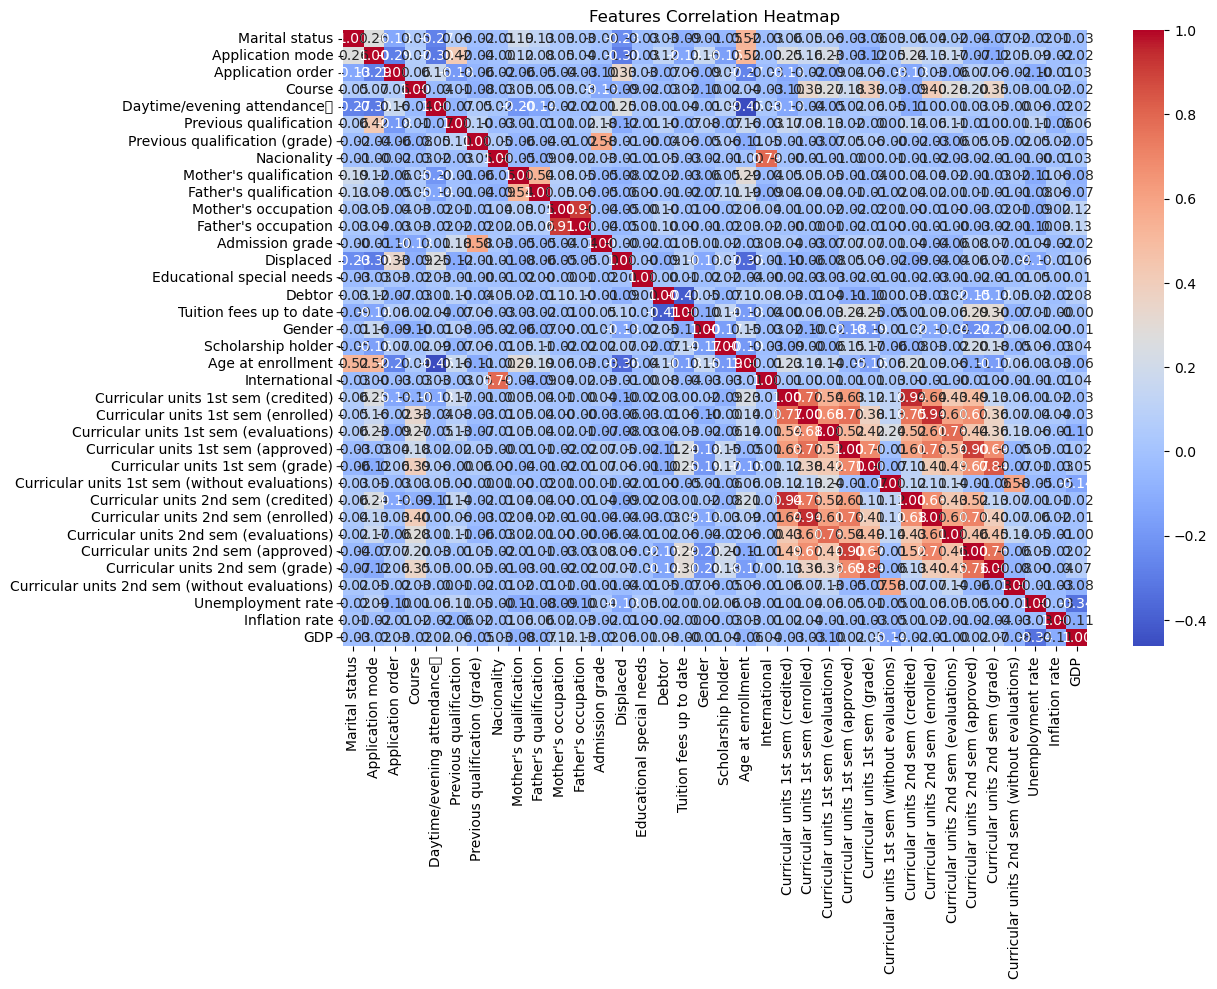

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr(numeric_only=True)

#plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Features Correlation Heatmap')
plt.show()

# Feature Selection

In [18]:
#select features and target
X = df.drop('Target',axis=1) #'Target' is the column were predicting 
y = df['Target']            

#  Split Data for Training and Testing

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)


# Train the model again
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.752542372881356

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       316
    Enrolled       0.45      0.28      0.34       151
    Graduate       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885


Confusion Matrix:
 [[244  27  45]
 [ 35  42  74]
 [ 14  24 380]]


In [46]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'output/logistic_model.joblib')

# Optional: save the scaler too if you want to use it for future predictions
joblib.dump(scaler, 'output/scaler.joblib')


['output/scaler.joblib']

In [47]:
import joblib
from sklearn.metrics import accuracy_score

# Load the model and scaler
loaded_model = joblib.load('output/logistic_model.joblib')
loaded_scaler = joblib.load('output/scaler.joblib')

# Scale the test data again (important!)
X_test_scaled_loaded = loaded_scaler.transform(X_test)

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled_loaded)

# Evaluate again
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded))


Loaded Model Accuracy: 0.7536723163841808


In [48]:
# Create a DataFrame of actual vs predicted
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_loaded
})

# Save to CSV
predictions_df.to_csv('output/predictions.csv', index=False)

print("Predictions saved to 'output/predictions.csv'")


Predictions saved to 'output/predictions.csv'
